In [1]:
import torch
import os
import train as tr
import network as nw
import utils
import numpy as np
import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# GET DEVICE AND CHECK.
gpu_flag = torch.cuda.is_available()
device = torch.device("cuda" if gpu_flag else "cpu")
print("GPU INFO : ", torch.cuda.get_device_name(device))

GPU INFO :  GeForce GTX 1060 6GB


In [3]:
DATASET_DIR = 'D:/dataset_car/kcar_preprocessed/kcar'
BATCH_SIZE = 16

d_total = utils.get_dataset(DATASET_DIR)

In [4]:
model = nw.ResNet18(in_channels=3, labelNum=100)
model.load_state_dict(torch.load('./result/resnet/_50.pt'))
f1_score_resnet = tr.prediction_with_fscore(
    dataset=d_total,
    model=model,
    device=device,
    batch_size=BATCH_SIZE
)

100%|██████████| 3932/3932 [04:55<00:00, 13.31it/s]


LABEL ARR GENERATE.


100%|██████████| 3932/3932 [00:00<00:00, 50409.29it/s]


PRED ARR GENERATE.


100%|██████████| 3932/3932 [00:00<00:00, 57824.88it/s]


number of points:  62900


In [5]:
model = nw.Model_1(in_channels=3, labelNum=100)
model.load_state_dict(torch.load('./result/model_1/_41.pt'))
f1_score_m1 = tr.prediction_with_fscore(
    dataset=d_total,
    model=model,
    device=device,
    batch_size=BATCH_SIZE
)

100%|██████████| 3932/3932 [04:15<00:00, 15.37it/s]


LABEL ARR GENERATE.


100%|██████████| 3932/3932 [00:00<00:00, 51064.53it/s]


PRED ARR GENERATE.


100%|██████████| 3932/3932 [00:00<00:00, 55378.34it/s]


number of points:  62900


In [6]:
model = nw.Model_2(in_channels=3, labelNum=100)
model.load_state_dict(torch.load('./result/model_2/_42.pt'))
f1_score_m2 = tr.prediction_with_fscore(
    dataset=d_total,
    model=model,
    device=device,
    batch_size=BATCH_SIZE
)

100%|██████████| 3932/3932 [07:10<00:00,  9.13it/s]


LABEL ARR GENERATE.


100%|██████████| 3932/3932 [00:00<00:00, 51064.21it/s]


PRED ARR GENERATE.


100%|██████████| 3932/3932 [00:00<00:00, 56984.91it/s]


number of points:  62900


(100,)
(100,)
(100,)


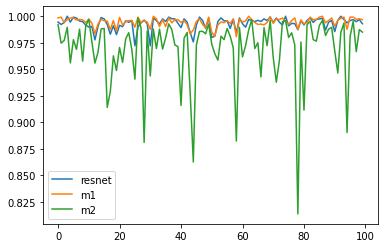

In [24]:
x_axis = [i for i in range(f1_score_m1.shape[0])]
print(f1_score_resnet.shape)
print(f1_score_m1.shape)
print(f1_score_m2.shape)

plt.plot(x_axis, f1_score_resnet, label='resnet')
plt.plot(x_axis, f1_score_m1, label='m1')
plt.plot(x_axis, f1_score_m2, label='m2')
plt.legend()
plt.show()

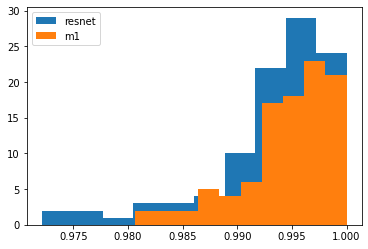

In [21]:
plt.hist(f1_score_resnet, label='resnet')
plt.hist(f1_score_m1, label='m1')
plt.legend()
plt.show()

In [23]:
print(np.var(f1_score_m1))
print(np.var(f1_score_resnet))

1.7780679993884106e-05
3.291200449441299e-05
